In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bestWithCat = pd.read_csv("..//module_2/bestsellers with categories.csv")
bestWithCat.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
bestWithCat.shape

(550, 7)

Ответ: О скольки книгах хранит данные датасет? 550

In [4]:
bestWithCat.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первичное исследование данных


Первичное исследование данных

In [5]:
bestWithCat.isna().sum(axis = 0, skipna = True)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Ответ: Есть ли в каких либо переменных пропуски? Нет

Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)

In [6]:
bestWithCat['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Ответ: Какие есть уникальные жанры? 'Non Fiction', 'Fiction'

распределение цен: постройте диаграмму

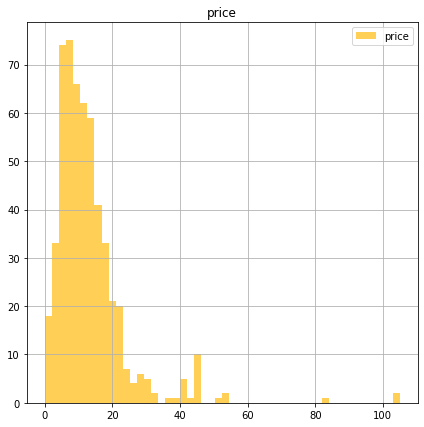

In [7]:
bestWithCat.hist(column='price', 
        figsize=(7, 7),
        legend=True,
        bins=50,
        color='#FFCF56')
plt.show()

какая цена у нас максимальная, минимальная, средняя, медианная

In [8]:
print("Максимальная цена: ", bestWithCat["price"].max())
print("Минимальная цена: ", bestWithCat["price"].min())
print("Средняя цена: ", bestWithCat["price"].mean())
print("Медианная цена: ", bestWithCat["price"].median())

Максимальная цена:  105
Минимальная цена:  0
Средняя цена:  13.1
Медианная цена:  11.0


# Поиск и сортировка данных

Ответ: Какой рейтинг в датасете наивысший? Ответ: 4.9

In [9]:
bestWithCat["user_rating"].max()

4.9

Ответ: Сколько книг имеют такой рейтинг? Ответ: 52

In [10]:
user_rat = bestWithCat[bestWithCat["user_rating"] == bestWithCat["user_rating"].max()]
user_rat["user_rating"].count()

52

Ответ: У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing

In [11]:
rev_max = bestWithCat["reviews"].max()
bestWithCat[bestWithCat['reviews'] == rev_max]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic...

In [12]:
t_df = bestWithCat[bestWithCat['year'] == 2015]
t_df[t_df['price'] == t_df['price'].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:20

In [13]:
bestWithCat[(bestWithCat['year'] == 2010) & (bestWithCat['genre'] == 'Fiction')]['name'].count()


20

Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах ?Ответ: 1

In [15]:
t_df = bestWithCat[bestWithCat['year'].isin([2010, 2011])]
t_df[t_df['user_rating'] == 4.9]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов

In [16]:
bestWithCat[(bestWithCat['year'] == 2015) & (bestWithCat['price'] < 8)].sort_values('price', axis = 0, ascending = True)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Ответ: Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)

# Агрегирование данных и соединения таблиц


Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min).

In [17]:
groupByGenre = bestWithCat.groupby("genre")
groupByGenre.first()

,name,author,user_rating,reviews,price,year
genre,,,,,,
Fiction,11/22/63: A Novel,Stephen King,4.6,2052,22,2011
Non Fiction,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016


In [19]:
p_min = groupByGenre.agg({'price':'min'}).rename({'price': 'min_price'}, axis = 1)
p_max = groupByGenre.agg({'price':'max'}).rename({'price': 'max_price'}, axis = 1)
totalPrice = pd.concat([p_min, p_max], axis = 1)
display(totalPrice)

,min_price,max_price
genre,,
Fiction,0,82
Non Fiction,0,105


Ответ: Максимальная цена для жанра Fiction: Ответ 82

Ответ: Минимальная цена для жанра Fiction: Ответ 0

Ответ: Максимальная цена для жанра Non Fiction: Ответ 105

Ответ: Минимальная цена для жанра Non Fiction: Ответ 0

Создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). 

In [20]:
groupByAuthor = bestWithCat.groupby("author")
groupByAuthor.first()

,name,user_rating,reviews,price,year,genre
author,,,,,,
Abraham Verghese,Cutting for Stone,4.6,4866,11,2010,Fiction
Adam Gasiewski,Milk and Vine: Inspirational Quotes From Class...,4.4,3113,6,2017,Non Fiction
Adam Mansbach,Go the F**k to Sleep,4.8,9568,9,2011,Fiction
Adir Levy,What Should Danny Do? (The Power to Choose Ser...,4.8,8170,13,2019,Fiction
Admiral William H. McRaven,Make Your Bed: Little Things That Can Change Y...,4.7,10199,11,2017,Non Fiction
...,...,...,...,...,...,...
Walter Isaacson,Leonardo da Vinci,4.5,3014,21,2017,Non Fiction
William Davis,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",4.4,7497,6,2012,Non Fiction
William P. Young,The Shack: Where Tragedy Confronts Eternity,4.6,19720,8,2009,Fiction


In [22]:
num_df = groupByAuthor.agg({'name':'count'}).rename({'name':'number_of_books'}, axis = 1)
display(num_df)

,number_of_books
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [23]:
num_df.shape

(248, 1)

Ответ: Какой размерности вышла таблица? Ответ: (248, 1)

In [24]:
num_df.sort_values('number_of_books', ascending = False)

,number_of_books
author,
Jeff Kinney,12
Gary Chapman,11
Suzanne Collins,11
Rick Riordan,11
American Psychological Association,10
...,...
David Grann,1
Larry Schweikart,1
David McCullough,1


Ответ: У какого автора больше всего книг? Ответ: Jeff Kinney	
Ответ: Сколько книг у этого автора? Ответ: 12

Cоздайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean).

In [25]:
rate_df  = groupByAuthor.agg({'user_rating' : 'mean'})
display(rate_df)

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [26]:
rate_df.sort_values('user_rating', ascending = True)

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


Ответ: У какого автора средний рейтинг минимальный? Ответ: Donna Tartt	
Ответ: Какой у этого автора средний рейтинг? Ответ: 3.9

In [27]:
res = pd.concat([num_df, rate_df], axis = 1)
display(res)

,number_of_books,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу

In [28]:
res.sort_values(by = ['number_of_books', 'user_rating'], ascending = [True, True])

,number_of_books,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Ответ: Какой автор первый в списке? Muriel Barbery	